In [2]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


tensor([[[0.3804, 0.3255, 0.3176,  ..., 0.3765, 0.4039, 0.5098],
         [0.3412, 0.2706, 0.2588,  ..., 0.2980, 0.3451, 0.4902],
         [0.3373, 0.2627, 0.2549,  ..., 0.2902, 0.3373, 0.4824],
         ...,
         [0.3216, 0.2549, 0.2471,  ..., 0.2784, 0.3412, 0.5137],
         [0.3725, 0.3176, 0.3098,  ..., 0.3333, 0.3882, 0.5216],
         [0.4941, 0.4863, 0.4824,  ..., 0.4980, 0.5137, 0.5490]],

        [[0.4275, 0.3843, 0.3804,  ..., 0.4275, 0.4510, 0.5333],
         [0.4000, 0.3412, 0.3333,  ..., 0.3647, 0.4039, 0.5137],
         [0.3961, 0.3373, 0.3294,  ..., 0.3569, 0.4000, 0.5137],
         ...,
         [0.3804, 0.3294, 0.3216,  ..., 0.3529, 0.4039, 0.5373],
         [0.4157, 0.3804, 0.3725,  ..., 0.3922, 0.4353, 0.5412],
         [0.5098, 0.5098, 0.5098,  ..., 0.5216, 0.5333, 0.5569]],

        [[0.4157, 0.3765, 0.3686,  ..., 0.4118, 0.4392, 0.5216],
         [0.3882, 0.3294, 0.3216,  ..., 0.3529, 0.3922, 0.5020],
         [0.3843, 0.3255, 0.3176,  ..., 0.3451, 0.3843, 0.

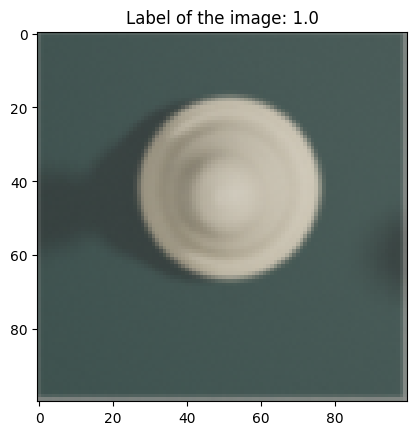

In [5]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, label_dir):
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.images = os.listdir(root_dir)
        self.labels = torch.load(label_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path)

        # Convert the image to a tensor
        image = transforms.ToTensor()(image)

        # Get the label of the image
        
        label = self.labels[int(img_name[3:9])]

        return image, label

train_dataset = CustomDataset(os.getcwd()+"/Square Images/Training", os.getcwd()+"/Square Images/y_generated.pt")
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Get the first batch of images and plot the first image using matplotlib and its label
images = next(iter(dataloader))
plt.imshow(images[0][0].permute(1, 2, 0).numpy())
plt.title("Label of the image: " + str(images[1][0].numpy()))
plt.show()